## Análise de Dados: Projetos de Investimento no DF

**Autora:** Mylena Trindade de Mendonça

**Data:** 16 de outubro de 2025

### Introdução
Este notebook apresenta a solução para o teste avaliativo para vaga de bolsista em engenharia/análise de dados. O projeto consiste em extrair dados da API ObrasGov.br, realizar o tratamento e a limpeza, armazenar em um banco de dados SQLite e, por fim, realizar uma análise para extrair insights sobre os projetos de investimento no Distrito Federal.

#

### Passo 1: Extração de Dados da API

Nesta etapa, utilizei a biblioteca `requests` para conectar ao endpoint `/projeto-investimento` da API do ObrasGov.br. Filtrei a requisição para obter apenas os projetos do Distrito Federal (UF='DF') e carreguei os dados recebidos em um DataFrame do `pandas` para a manipulação inicial.

In [57]:
import requests
import pandas as pd

BASE_URL = "https://api.obrasgov.gestao.gov.br/obrasgov/api"
ENDPOINT = "/projeto-investimento"
URL_COMPLETA = f"{BASE_URL}{ENDPOINT}"

parametros = {
    'uf': 'DF'
}

print("Buscando os dados da API")
response = requests.get(URL_COMPLETA, params=parametros)
dados_json = response.json()
print("Dados recebidos com sucesso!")

df = pd.DataFrame(dados_json['content'])

print("Resultado:")
df.head()

Buscando os dados da API
Dados recebidos com sucesso!
Resultado:


,idUnico,nome,cep,endereco,descricao,funcaoSocial,metaGlobal,dataInicialPrevista,dataFinalPrevista,dataInicialEfetiva,...,observacoesPertinentes,isModeladaPorBim,dataSituacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontesDeRecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."


#


### Passo 2: Busca Exploratória dos Dados

Com os dados carregados, realizei uma análise exploratória para entender a estrutura do DataFrame. Verifiquei as dimensões, os tipos de dados de cada coluna e a quantidade de valores nulos. Esta etapa foi fundamental para identificar os problemas que precisavam ser corrigidos na fase de tratamento.

In [ ]:
print("Informações do DataFrame:")
df.info()

print("\n\n Colunas Numérica:")
print(df.describe())

print("\n\n Valores nulos por coluna:")
print(df.isnull().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   idUnico                             10 non-null     object
 1   nome                                10 non-null     object
 2   cep                                 6 non-null      object
 3   endereco                            6 non-null      object
 4   descricao                           10 non-null     object
 5   funcaoSocial                        10 non-null     object
 6   metaGlobal                          10 non-null     object
 7   dataInicialPrevista                 10 non-null     object
 8   dataFinalPrevista                   10 non-null     object
 9   dataInicialEfetiva                  0 non-null      object
 10  dataFinalEfetiva                    0 non-null      object
 11  dataCadastro                       

#

### Passo 3: Tratamento e Limpeza dos Dados

Nesta fase, preparei os dados para a análise. As principais ações foram:
- Padronização dos nomes de todas as colunas para letras minúsculas.
- Conversão das colunas de data de texto para o formato `datetime`.
- Conversão de colunas numéricas (como quantidade de empregos) para o tipo `float`.
- Tratamento de valores ausentes, preenchendo campos vazios com 'Não informado' ou 0, conforme o contexto.

In [60]:
print("Padronizando nomes das colunas para minúsculo")
df.columns = df.columns.str.lower()

print("Convertendo colunas de data")
colunas_de_data = ['datainicialprevista', 'datafinalprevista', 'datainicialefetiva',
                   'datafinalefetiva', 'datacadastro', 'datasituacao']
for coluna in colunas_de_data:
    df[coluna] = pd.to_datetime(df[coluna], errors='coerce')

print("Convertendo colunas numéricas")
colunas_numericas = ['qdtempregosgerados', 'populacaobeneficiada']
for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

print("Tratando valores ausentes")
df['qdtempregosgerados'] = df['qdtempregosgerados'].fillna(0)
df['populacaobeneficiada'] = df['populacaobeneficiada'].fillna(0)
df['cep'] = df['cep'].fillna('Não informado')
df['endereco'] = df['endereco'].fillna('Não informado')

print("\nInformações do DataFrame limpo")
df.info()

print("\nResultado:")
df.head()

Padronizando nomes das colunas para minúsculo
Convertendo colunas de data
Convertendo colunas numéricas
Tratando valores ausentes

Informações do DataFrame limpo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   idunico                             10 non-null     object        
 1   nome                                10 non-null     object        
 2   cep                                 10 non-null     object        
 3   endereco                            10 non-null     object        
 4   descricao                           10 non-null     object        
 5   funcaosocial                        10 non-null     object        
 6   metaglobal                          10 non-null     object        
 7   datainicialprevista                 10 non-null     datetime64[ns]
 8   datafinalpr

,idunico,nome,cep,endereco,descricao,funcaosocial,metaglobal,datainicialprevista,datafinalprevista,datainicialefetiva,...,observacoespertinentes,ismodeladaporbim,datasituacao,tomadores,executores,repassadores,eixos,tipos,subtipos,fontesderecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,Não informado,Não informado,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,NaT,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,Não informado,Não informado,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,NaT,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,NaT,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,Não informado,Não informado,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,NaT,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",Não informado,Não informado,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,NaT,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."


#

### Passo 4: Armazenamento dos Dados

Com os dados limpos e estruturados, o próximo passo foi armazená-los em um banco de dados relacional. Foi utilizado o **SQLite** pela sua simplicidade e portabilidade. As colunas que continham listas foram convertidas para o formato de texto JSON para garantir a compatibilidade com o banco. Os dados foram salvos em uma tabela chamada `projetos_investimento`.

In [ ]:
import json
from sqlalchemy import create_engine

colunas_com_listas = []
for coluna in df.columns:
    if not df[coluna].dropna().empty and isinstance(df[coluna].dropna().iloc[0], list):
        colunas_com_listas.append(coluna)

print("Colunas com listas identificadas:", colunas_com_listas)

df_para_salvar = df.copy()
print("\nConvertendo colunas para o formato de texto JSON")
for coluna in colunas_com_listas:
    df_para_salvar[coluna] = df_para_salvar[coluna].apply(json.dumps)
print("Conversão concluída!")

engine = create_engine('sqlite:///obras_df.db')
print("\nConexão criada com sucesso.")

print("Salvando dados na tabela 'projetos_investimento'...")
df_para_salvar.to_sql('projetos_investimento', con=engine, if_exists='replace', index=False)
print("Dados salvos com sucesso!")

# 4. Verificação
print("\nVerificando os dados salvos no banco:")
df_do_banco = pd.read_sql('SELECT * FROM projetos_investimento', engine)
df_do_banco.head()

Colunas com listas identificadas: ['tomadores', 'executores', 'repassadores', 'eixos', 'tipos', 'subtipos', 'fontesderecurso']

Convertendo colunas para o formato de texto JSON
Conversão concluída!

Conexão criada com sucesso.
Salvando dados na tabela 'projetos_investimento'...
Dados salvos com sucesso!

Verificando os dados salvos no banco:


,idunico,nome,cep,endereco,descricao,funcaosocial,metaglobal,datainicialprevista,datafinalprevista,datainicialefetiva,...,observacoespertinentes,ismodeladaporbim,datasituacao,tomadores,executores,repassadores,eixos,tipos,subtipos,fontesderecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,Não informado,Não informado,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20 00:00:00.000000,2027-12-05 00:00:00.000000,None,...,None,0.0,2024-12-20 00:00:00.000000,[],"[{""nome"": ""DEPARTAMENTO NACIONAL DE INFRAESTRU...",[],"[{""id"": 3, ""descricao"": ""Econ\u00f4mico""}]","[{""id"": 25, ""descricao"": ""Rodovia"", ""idEixo"": 3}]","[{""id"": 4, ""descricao"": ""Acessos Terrestres"", ...","[{""origem"": ""Federal"", ""valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,Não informado,Não informado,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02 00:00:00.000000,2028-09-02 00:00:00.000000,None,...,None,0.0,2025-09-05 00:00:00.000000,[],"[{""nome"": ""SECRETARIA DE ESTADO DE EDUCACAO DO...","[{""nome"": ""FUNDO NACIONAL DE DESENVOLVIMENTO D...","[{""id"": 4, ""descricao"": ""Social""}]","[{""id"": 46, ""descricao"": ""Educa\u00e7\u00e3o"",...","[{""id"": 84, ""descricao"": ""Educa\u00e7\u00e3o"",...","[{""origem"": ""Federal"", ""valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14 00:00:00.000000,2024-08-28 00:00:00.000000,None,...,None,0.0,2023-02-06 00:00:00.000000,[],"[{""nome"": ""CORPO DE BOMBEIROS MILITAR DO DISTR...","[{""nome"": ""CORPO DE BOMBEIROS MILITAR DO DISTR...","[{""id"": 1, ""descricao"": ""Administrativo""}]","[{""id"": 1, ""descricao"": ""Seguran\u00e7a P\u00f...","[{""id"": 59, ""descricao"": ""Obras em Im\u00f3vei...","[{""origem"": ""Federal"", ""valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,Não informado,Não informado,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30 00:00:00.000000,2028-08-30 00:00:00.000000,None,...,None,0.0,2023-08-28 00:00:00.000000,[],"[{""nome"": ""DEPARTAMENTO DE ESTRADAS DE RODAGEM...","[{""nome"": ""MINIST\u00c9RIO DAS CIDADES"", ""codi...","[{""id"": 3, ""descricao"": ""Econ\u00f4mico""}]","[{""id"": 24, ""descricao"": ""Infraestrutura Urban...","[{""id"": 57, ""descricao"": ""Obra de Arte Especia...","[{""origem"": ""Federal"", ""valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",Não informado,Não informado,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14 00:00:00.000000,2024-03-14 00:00:00.000000,None,...,None,0.0,2023-08-29 00:00:00.000000,[],"[{""nome"": ""FUNDACAO UNIVERSIDADE DE BRASILIA"",...","[{""nome"": ""FUNDACAO UNIVERSIDADE DE BRASILIA"",...","[{""id"": 3, ""descricao"": ""Econ\u00f4mico""}, {""i...","[{""id"": 31, ""descricao"": ""Energia"", ""idEixo"": ...","[{""id"": 95, ""descricao"": ""Subesta\u00e7\u00e3o...","[{""origem"": ""Federal"", ""valorInvestimentoPrevi..."


In [56]:
#

### Passo 5: Análise Quantitativa e Qualitativa

Esta é a etapa final, onde busquei responder perguntas e extrair insights a partir dos dados tratados. Utilizei as bibliotecas `matplotlib` e `seaborn` para criar visualizações que ajudam a comunicar as descobertas de forma clara.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style('whitegrid')
sns.set_palette('viridis') 

print("Bibliotecas importadas e estilo configurado.")

Bibliotecas importadas e estilo configurado.


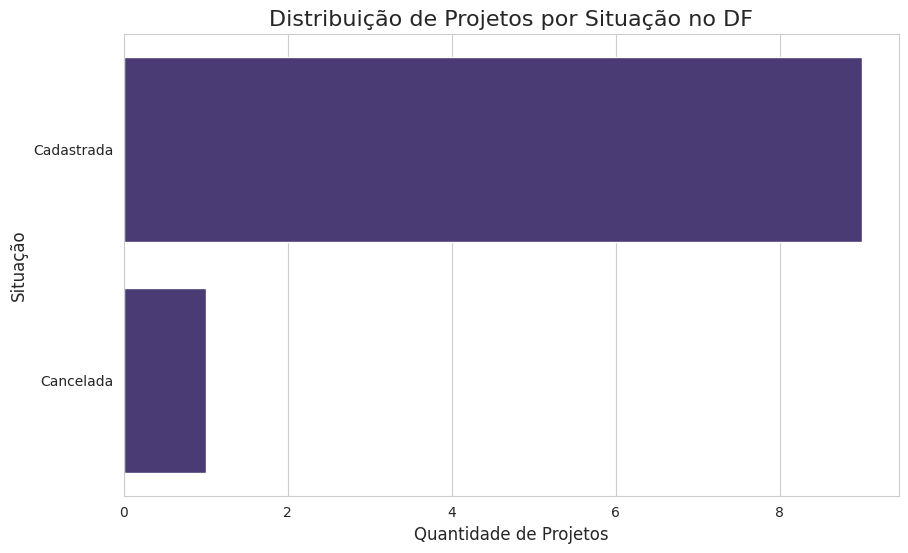

In [ ]:
plt.figure(figsize=(10, 6)) 

sns.countplot(y=df['situacao'])

plt.title('Distribuição de Projetos por Situação no DF', fontsize=16)
plt.xlabel('Quantidade de Projetos', fontsize=12)
plt.ylabel('Situação', fontsize=12)

plt.show()

Este gráfico revela o estágio atual dos investimentos no DF, mostrando que a grande maioria das iniciativas (90%) já foi oficialmente registrada no sistema com o status cadastrada. Isso indica que os projetos estão formalmente planejados e aguardam as próximas etapas para sua efetiva implementação.

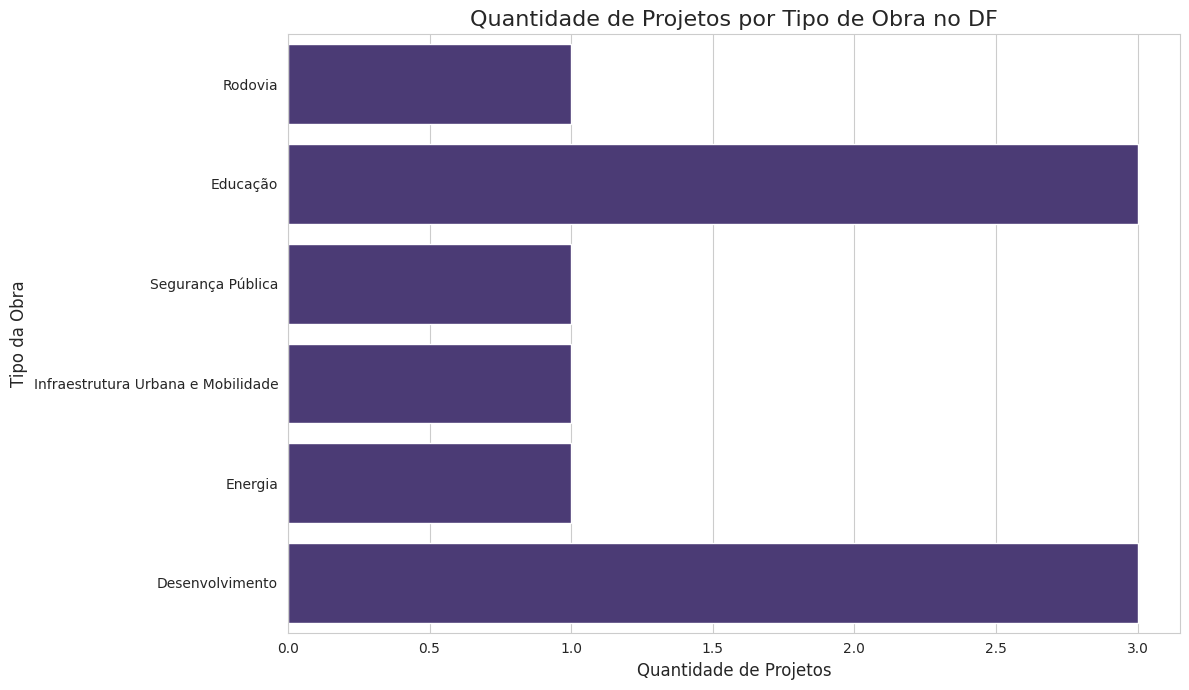

In [ ]:
def extrair_tipo_corrigido(lista_de_tipos):
    try:
        if lista_de_tipos:
            return lista_de_tipos[0]['descricao']
    except:
        return 'Não especificado'
    
df['tipo_obra'] = df['tipos'].apply(extrair_tipo_corrigido)

plt.figure(figsize=(12, 7))
sns.countplot(y=df['tipo_obra'])

plt.title('Quantidade de Projetos por Tipo de Obra no DF', fontsize=16)
plt.xlabel('Quantidade de Projetos', fontsize=12)
plt.ylabel('Tipo da Obra', fontsize=12)

plt.tight_layout()
plt.show()

Este gráfico mostra para onde os recursos estão sendo direcionados. A Educação e  o Desenvolvimento lideram como as áreas com mais projetos, indicando um forte foco no crescimento social e econômico.